In [1]:
import awkward as ak
import numpy as np
import hist as hs
from coffea import processor, hist as chs
from coffea.nanoevents.methods import vector, candidate
from numba import jit

from coffea.nanoevents import BaseSchema
import mplhep as hep
import matplotlib.pyplot as plt
from datetime import date
today = date.today()

plt.style.use(hep.style.CMS)

/uscms_data/d3/aaportel/micromamba/envs/analysis-env/lib/python3.9/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [127]:
class LLP_ntuple_processor(processor.ProcessorABC):
    """
    This class is used to process the ntuples created by the LLP ntuple producer.
    """

    def cscCutter(self, events, cut): # i hate this.
        if events.metadata['dataset'] == 'signal':
            events.cscRechitCluster_match_gLLP_deltaR = events.cscRechitCluster_match_gLLP_deltaR[cut]
        
        if events.metadata['dataset'] == 'background':   
            events.cscRechitCluster_match_cluster_index = events.cscRechitCluster_match_cluster_index[cut]
            events.cscRechitCluster_match_cluster_dR = events.cscRechitCluster_match_cluster_dR[cut]    
    
        events.cscRechitClusterEtaSpread = events.cscRechitClusterEtaSpread[cut]
        events.cscRechitClusterSize = events.cscRechitClusterSize[cut]
        events.cscRechitClusterNRechitChamberPlus21 = events.cscRechitClusterNRechitChamberPlus21[cut]
        events.cscRechitClusterAvgStation10perc = events.cscRechitClusterAvgStation10perc[cut]
        events.cscRechitClusterYSpread = events.cscRechitClusterYSpread[cut]
        events.cscRechitClusterNStation10perc = events.cscRechitClusterNStation10perc[cut]
        events.cscRechitClusterNRechitChamberMinus11 = events.cscRechitClusterNRechitChamberMinus11[cut]
        events.cscRechitClusterMe12Ratio = events.cscRechitClusterMe12Ratio[cut]
        events.cscRechitClusterMe11Ratio = events.cscRechitClusterMe11Ratio[cut]
        events.cscRechitCluster_match_MB1_0p4 = events.cscRechitCluster_match_MB1_0p4[cut]
        events.cscRechitClusterMuonVetoPhi = events.cscRechitClusterMuonVetoPhi[cut]
        events.cscRechitClusterTimeWeighted = events.cscRechitClusterTimeWeighted[cut]
        events.cscRechitCluster_match_dtRechits_0p4 = events.cscRechitCluster_match_dtRechits_0p4[cut]
        events.cscRechitCluster_match_MB1Seg_0p4 = events.cscRechitCluster_match_MB1Seg_0p4[cut]
        events.cscRechitClusterNRechitChamberMinus41 = events.cscRechitClusterNRechitChamberMinus41[cut]
        events.cscRechitClusterMajorAxis = events.cscRechitClusterMajorAxis[cut]
        events.cscRechitClusterTimeSpreadWeightedAll = events.cscRechitClusterTimeSpreadWeightedAll[cut]
        events.cscRechitClusterMuonVetoGlobal = events.cscRechitClusterMuonVetoGlobal[cut]
        events.cscRechitClusterJetVetoPt = events.cscRechitClusterJetVetoPt[cut]
        events.cscRechitCluster_match_RB1_0p4 = events.cscRechitCluster_match_RB1_0p4[cut]
        events.cscRechitClusterJetVetoPhi = events.cscRechitClusterJetVetoPhi[cut]
        events.cscRechitClusterNRechitChamberPlus11 = events.cscRechitClusterNRechitChamberPlus11[cut]
        events.cscRechitClusterMuonVetoLooseId = events.cscRechitClusterMuonVetoLooseId[cut]
        events.cscRechitClusterNRechitChamberPlus41 = events.cscRechitClusterNRechitChamberPlus41[cut]
        events.cscRechitClusterNRechitChamberMinus31 = events.cscRechitClusterNRechitChamberMinus31[cut]
        events.cscRechitClusterNRechitChamberMinus22 = events.cscRechitClusterNRechitChamberMinus22[cut]
        events.cscRechitClusterTimeSpreadWeighted = events.cscRechitClusterTimeSpreadWeighted[cut]
        events.cscRechitClusterNRechitChamberMinus21 = events.cscRechitClusterNRechitChamberMinus21[cut]
        events.cscRechitClusterNRechitChamberPlus32 = events.cscRechitClusterNRechitChamberPlus32[cut]
        events.cscRechitClusterPhiSpread = events.cscRechitClusterPhiSpread[cut]
        events.cscRechitClusterDeltaRSpread = events.cscRechitClusterDeltaRSpread[cut]
        events.cscRechitClusterX = events.cscRechitClusterX[cut]
        events.cscRechitCluster_match_dtSeg_0p4 = events.cscRechitCluster_match_dtSeg_0p4[cut]
        events.cscRechitClusterXYSpread = events.cscRechitClusterXYSpread[cut]
        events.cscRechitClusterMaxStation = events.cscRechitClusterMaxStation[cut]
        events.cscRechitClusterNStation = events.cscRechitClusterNStation[cut]
        events.cscRechitCluster_match_cscRechits_0p4 = events.cscRechitCluster_match_cscRechits_0p4[cut]
        events.cscRechitClusterPhi = events.cscRechitClusterPhi[cut]
        events.cscRechitClusterMaxChamberRatio = events.cscRechitClusterMaxChamberRatio[cut]
        events.cscRechitClusterNRechitChamberMinus42 = events.cscRechitClusterNRechitChamberMinus42[cut]
        events.cscRechitCluster_match_dtRechits_phi0p2 = events.cscRechitCluster_match_dtRechits_phi0p2[cut]
        events.cscRechitClusterRSpread = events.cscRechitClusterRSpread[cut]
        events.cscRechitClusterAvgStation = events.cscRechitClusterAvgStation[cut]
        events.cscRechitClusterNChamber = events.cscRechitClusterNChamber[cut]
        events.cscRechitClusterEtaPhiSpread = events.cscRechitClusterEtaPhiSpread[cut]
        events.cscRechitClusterMaxStationRatio = events.cscRechitClusterMaxStationRatio[cut]
        events.cscRechitClusterMetEENoise_dPhi = events.cscRechitClusterMetEENoise_dPhi[cut]
        events.cscRechitClusterJetVetoE = events.cscRechitClusterJetVetoE[cut]
        events.cscRechitClusterMaxChamber = events.cscRechitClusterMaxChamber[cut]
        events.cscRechitClusterNStation10 = events.cscRechitClusterNStation10[cut]
        events.cscRechitClusterZ = events.cscRechitClusterZ[cut]
        events.cscRechitClusterTimeSpread = events.cscRechitClusterTimeSpread[cut]
        events.cscRechitClusterAvgStation5 = events.cscRechitClusterAvgStation5[cut]
        events.cscRechitClusterXSpread = events.cscRechitClusterXSpread[cut]
        events.cscRechitClusterNRechitChamberPlus13 = events.cscRechitClusterNRechitChamberPlus13[cut]
        events.cscRechitClusterZSpread = events.cscRechitClusterZSpread[cut]
        events.cscRechitClusterGenMuonDeltaR = events.cscRechitClusterGenMuonDeltaR[cut]
        events.cscRechitClusterY = events.cscRechitClusterY[cut]
        events.cscRechitClusterEta = events.cscRechitClusterEta[cut]
        events.cscRechitClusterNStation5 = events.cscRechitClusterNStation5[cut]
        events.cscRechitClusterTimeTotal = events.cscRechitClusterTimeTotal[cut]
        events.cscRechitClusterNRechitChamberPlus22 = events.cscRechitClusterNRechitChamberPlus22[cut]
        events.cscRechitClusterMuonVetoE = events.cscRechitClusterMuonVetoE[cut]
        events.cscRechitClusterNRechitChamberMinus12 = events.cscRechitClusterNRechitChamberMinus12[cut]
        events.cscRechitClusterNRechitChamberPlus31 = events.cscRechitClusterNRechitChamberPlus31[cut]
        events.cscRechitClusterNRechitChamberMinus32 = events.cscRechitClusterNRechitChamberMinus32[cut]
        events.cscRechitClusterNRechitChamberPlus12 = events.cscRechitClusterNRechitChamberPlus12[cut]
        events.cscRechitClusterMuonVetoEta = events.cscRechitClusterMuonVetoEta[cut]
        events.cscRechitClusterNRechitChamberPlus42 = events.cscRechitClusterNRechitChamberPlus42[cut]
        events.cscRechitClusterMuonVetoPt = events.cscRechitClusterMuonVetoPt[cut]
        events.cscRechitClusterJetVetoEta = events.cscRechitClusterJetVetoEta[cut]
        events.cscRechitClusterMinorAxis = events.cscRechitClusterMinorAxis[cut]
        events.cscRechitClusterAvgStation10 = events.cscRechitClusterAvgStation10[cut]
        events.cscRechitClusterTime = events.cscRechitClusterTime[cut]
        events.cscRechitClusterNRechitChamberMinus13 = events.cscRechitClusterNRechitChamberMinus13[cut]
        events.cscRechitCluster_match_RE12_0p4 = events.cscRechitCluster_match_RE12_0p4[cut]   
        
        return events[ak.any(cut, axis = 1)]

    def muonCutter(self, events, cut): 
        '''reads: 
        First cut all the muons in all events.
        If there are no muons left, cut the whole event for all fields
        '''
        events.muonE = events.muonE[cut]
        events.muonPt = events.muonPt[cut]
        events.muonEta = events.muonEta[cut]
        events.muonPhi = events.muonPhi[cut]
        events.muonPdgId = events.muonPdgId[cut]
        events.muonDZ = events.muonDZ[cut]
        events.muonLooseId = events.muonLooseId[cut]
        events.muonTightId = events.muonTightId[cut]
        
        return events[ak.any(cut, axis = 1)]

    def deltaRPhiEtaCutter(self, events, cut): 
        '''reads: 
        First cut all the delta_s in all events.
        If there are no muons left, cut the whole event for all fields.
        '''        
        events.deltaR_muon_cls = events.deltaR_muon_cls[cut]
        events.deltaPhi_muon_cls = events.deltaPhi_muon_cls[cut]
        events.deltaEta_muon_cls = events.deltaEta_muon_cls [cut]   
        events = self.cscCutter(events, cut)
        
        return events[ak.any(cut, axis = 1)]
        
    def muon_acc_cut(self, events):
        cut = (ak.count(events.muonPhi, axis = 1) > 0)     
        return events[cut]
    
    def lead_muon_cut(self, events):
        cut = ak.max(events.muonPt, 1) == events.muonPt
        return self.muonCutter(events, cut)
    
    def llp_acc_cut(self, events):
        if events.metadata['dataset'] == 'signal':
            cut = (events.gLLP_csc == 1)
            return events[cut]
        else:
            return events

    def deltaRPhiEta_muon_cls(self, events):
        clusts = ak.zip(
            {
                'pt': ak.zeros_like(events.cscRechitClusterPhi),
                'phi': events.cscRechitClusterPhi,
                'eta': events.cscRechitClusterEta,
                'E': ak.zeros_like(events.cscRechitClusterPhi),
            },
            with_name = 'PtEtaPhiMLorentzVector',
            behavior = vector.behavior,                 
          )
        
        muons = ak.zip(
            {
                'pt': events.muonPt,
                'phi': events.muonPhi,
                'eta': events.muonEta,
                'E': events.muonE,
            },
            with_name = 'PtEtaPhiMLorentzVector',
            behavior = vector.behavior,                 
          )
        
        muon_cls_pairs = ak.cartesian({
            "clusts": clusts, 
            "muons": muons
        })
        
        deltaR = (muon_cls_pairs.clusts).delta_r(muon_cls_pairs.muons)
        deltaEta = abs(muon_cls_pairs.clusts.eta - muon_cls_pairs.muons.eta)
        deltaPhi = np.arctan2(np.sin(muon_cls_pairs.clusts.phi - muon_cls_pairs.muons.phi), 
                              np.cos(muon_cls_pairs.clusts.phi - muon_cls_pairs.muons.phi))
        
        '''
        for i in range(len(deltaR)):
            if i in [4579,15785,19586,26798,28666]:
                print(f'no muons| muon.phi: {muons.phi[i]}, deltaR: {deltaR[i]}, clusterZ {events.cscRechitClusterZ[i]}')
            if i in range(25):
                print(f'muons| muon.phi: {muons.phi[i]}, deltaR: {deltaR[i]}, clusterZ {events.cscRechitClusterZ[i]}')
        '''
        
        return deltaR, deltaPhi, deltaEta
    
    def deltaR_muon_cls_cut(self, events):
        
        
        cut = events.deltaR_muon_cls > 1.
        return self.deltaRPhiEtaCutter(events, cut)
    
    
    def process(self, events):
        muoncut = abs(events.lepPdgId == 13)
        events['muonE'] = events.lepE[muoncut]
        events['muonPt'] = events.lepPt[muoncut]
        events['muonEta'] = events.lepEta[muoncut]
        events['muonPhi'] = events.lepPhi[muoncut]
        events['muonPdgId'] = events.lepPdgId[muoncut]
        events['muonDZ'] = events.lepDZ[muoncut]
        events['muonLooseId'] = events.lepLooseId[muoncut]
        events['muonTightId'] = events.lepTightId[muoncut]

        print(events.muonPt)       
        events = self.lead_muon_cut(events)
        print(events.muonPt)
        events = self.muon_acc_cut(events)
        print(events.muonPt)
        
        
        events = self.llp_acc_cut(events)
        
        deltaR_muon_cls, deltaPhi_muon_cls, deltaEta_muon_cls = self.deltaRPhiEta_muon_cls(events)
        events['deltaR_muon_cls'] = deltaR_muon_cls
        events['deltaPhi_muon_cls'] = deltaPhi_muon_cls
        events['deltaEta_muon_cls'] = deltaEta_muon_cls

        
        dataset = events.metadata['dataset']
        out = {
            dataset: {
                "entries": len(events),
            },
            "cuts": {},
            "vars": {},

        }
        
 
        return out   
    
    def postprocess(self, accumulator):
        return accumulator

In [128]:
date = today.strftime("%m_%d_%y")

fileset = {}
fileset['signal']     = ['root://cmsxrootd.fnal.gov//store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v2/v3/normalized/BToKPhi_MuonGenFilter_mPhi1p0_ctau1000_1pb_weighted.root',]
#fileset['background'] = ['root://cmsxrootd.fnal.gov//store/user/christiw/displacedJetMuonAnalyzer/csc/V1p171/Data2018_UL/v3/normalized/ParkingBPH4_Run2018A_goodLumi.root']
out = processor.run_uproot_job(
    fileset,
    treename="MuonSystem",
    processor_instance=LLP_ntuple_processor(),
    executor=processor.futures_executor,
    executor_args={"schema": BaseSchema, "workers": 1},
    maxchunks = 1
)

cuts = list(out['cuts'].keys())
varnames = list(out['vars'].keys())

Output()

[[10.1, 2.3, 1.45], [1.72, 1.68, 1.36, 1.3, 1.19, ... [], [1.11], [1.96, 1.3]]
[[10.1, 2.3, 1.45], [1.72, 1.68, 1.36, 1.3, ... 0.752], None, [1.11], [1.96, 1.3]]
[[10.1, 2.3, 1.45], [1.72, 1.68, 1.36, 1.3, ... 0.752], None, [1.11], [1.96, 1.3]]


In [50]:
for cut in cuts:
    h = out['signal'][cut]
    print(f'{cut}, {h}')

total, 102974
acc_cut, 10512
csc_eff_cut, 1819
ME11_veto, 1061
ME12_veto, 817
re12_cut, 807
mb1_cut, 798
rb1_cut, 789
deltaR_muon_cls_cut, 677
time_cut, 632
cls_eta_cut, 339
cls_size_cut, 130


In [51]:
from hist.intervals import ratio_uncertainty
def ratio(num, den, ax):
    ax.errorbar(
        x=num.axes[0].centers,
        y=num.view() / den.view() ,
        yerr=ratio_uncertainty(num.view(), den.view()),
        color="k",
        linestyle="none",
        marker="o",
        elinewidth=1,
    )
    return ax


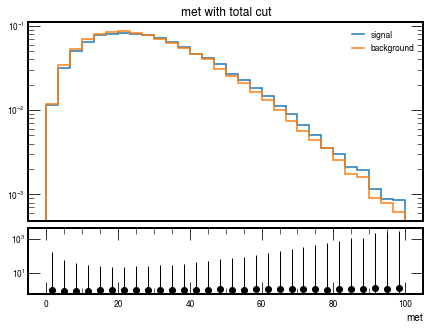

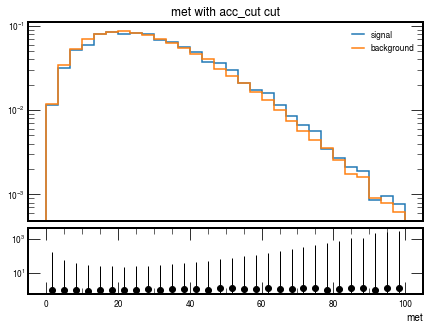

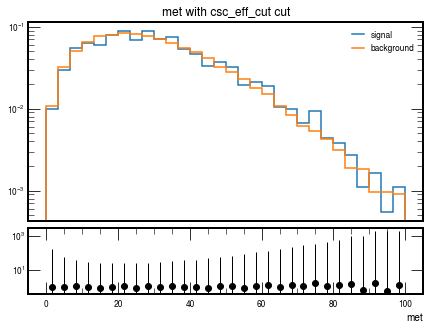

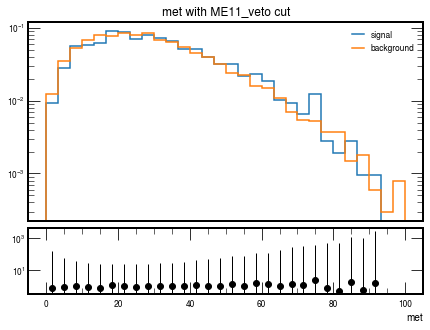

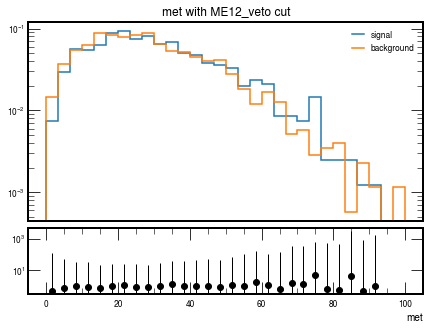

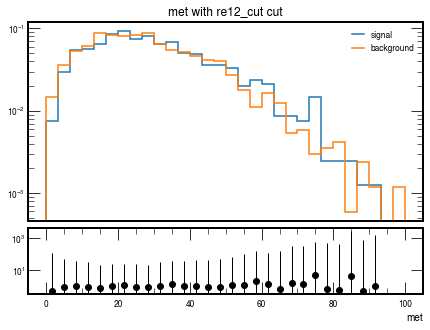

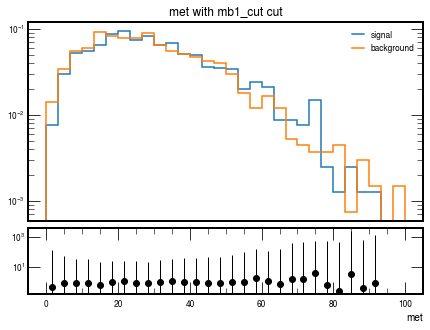

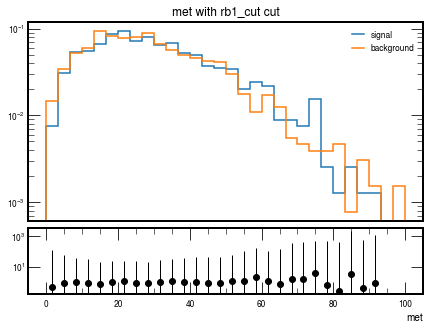

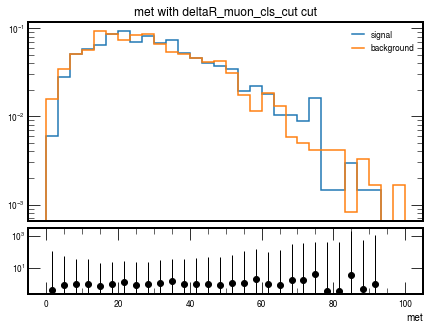

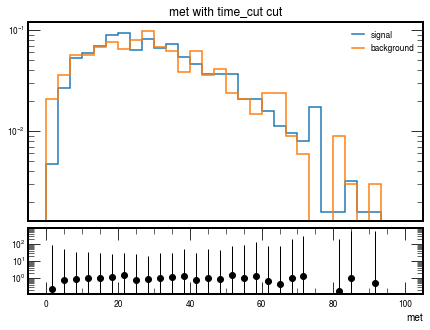

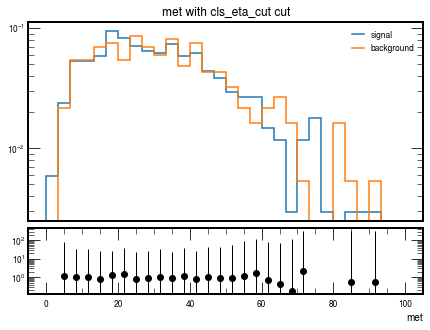

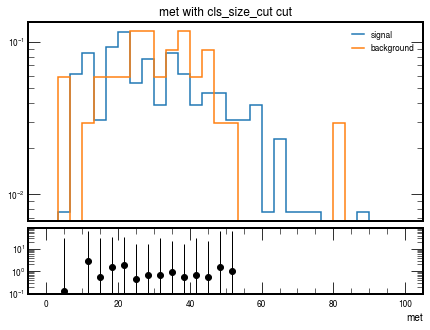

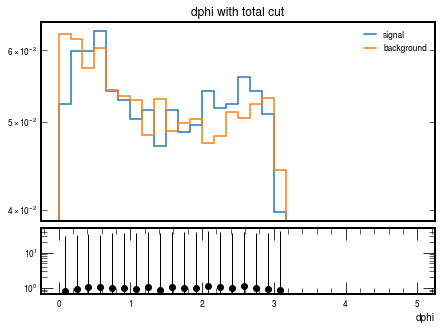

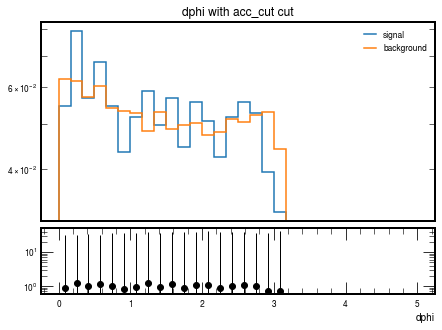

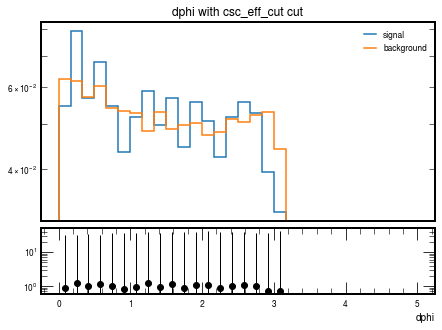

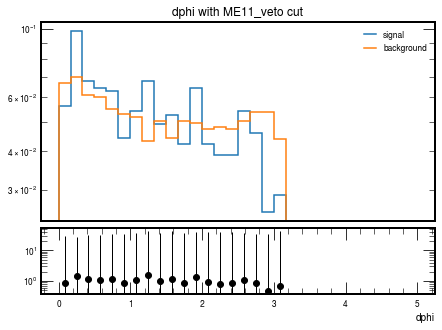

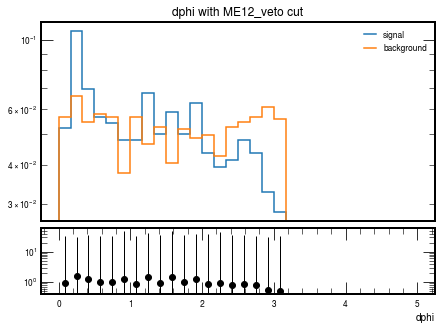

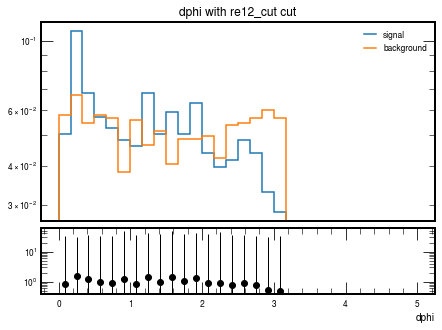

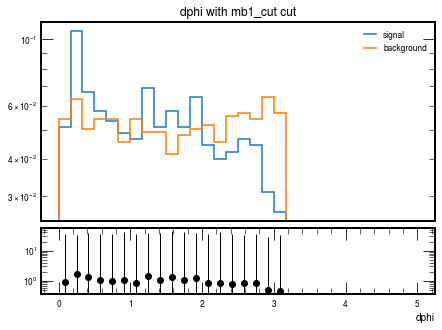

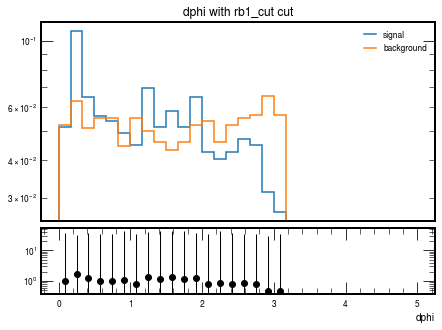

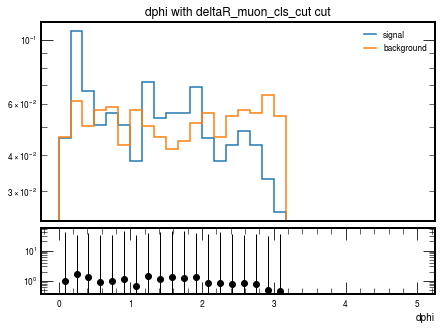

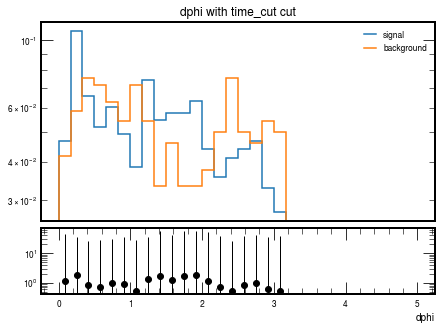

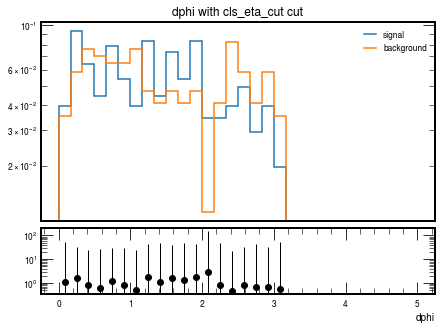

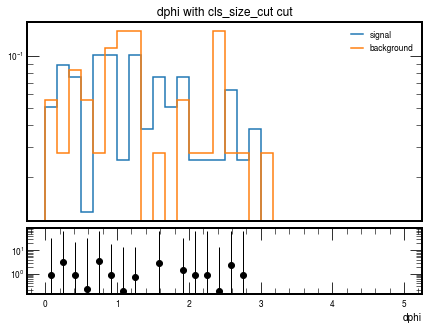

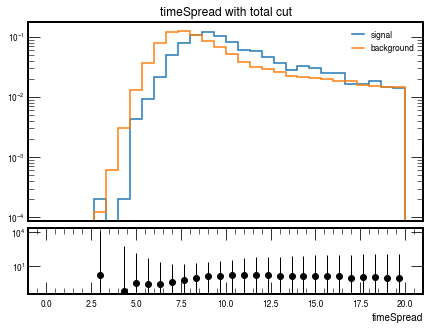

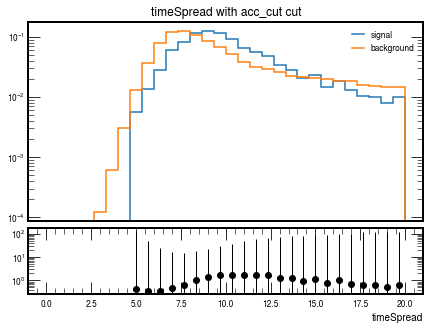

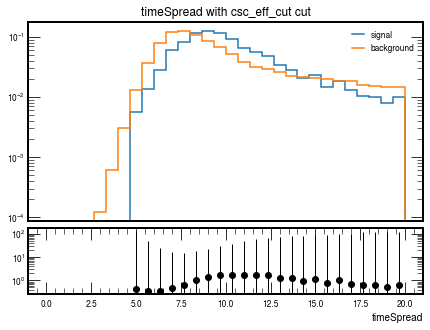

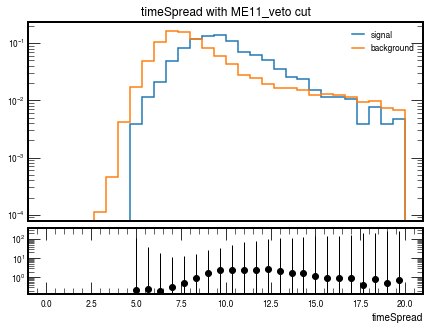

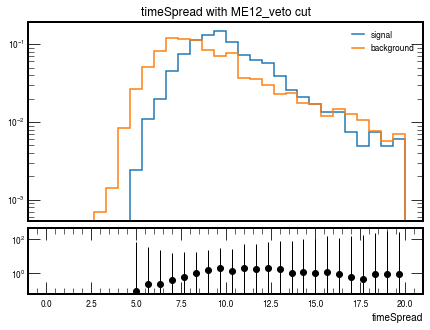

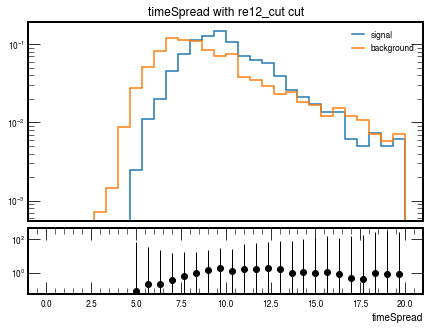

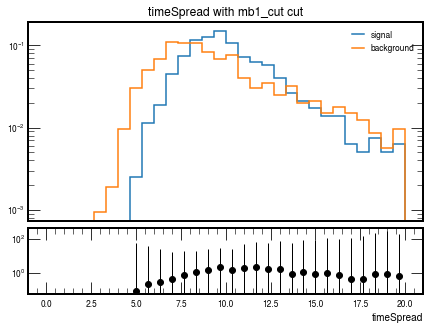

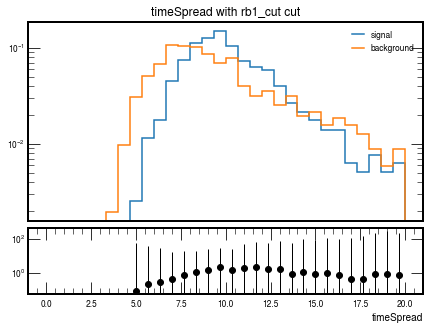

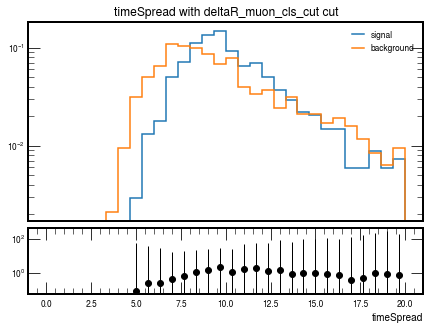

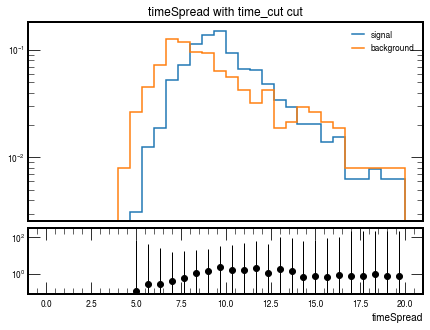

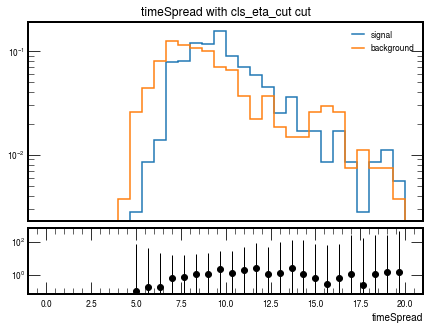

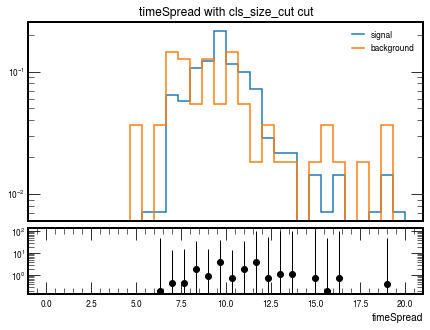

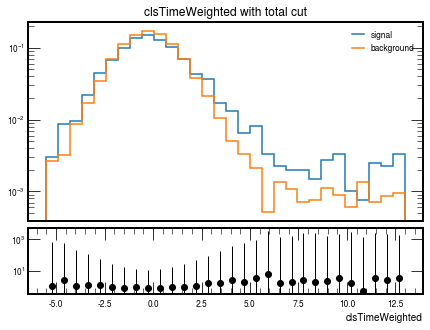

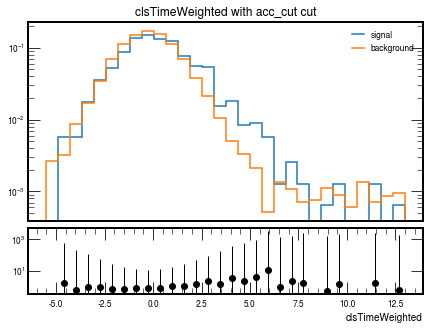

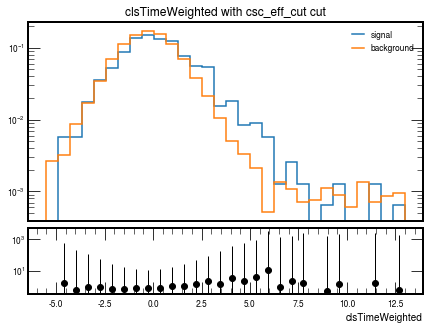

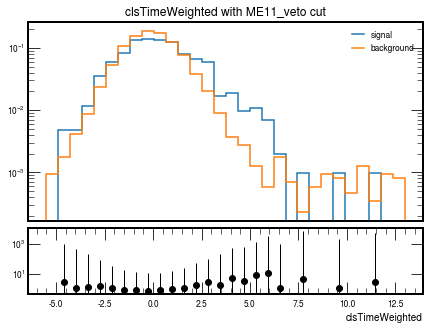

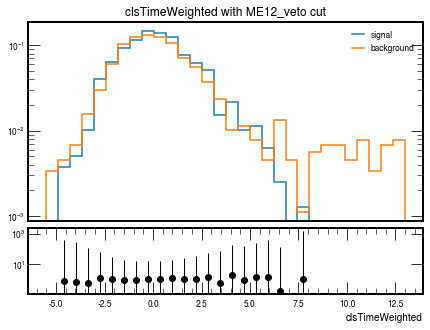

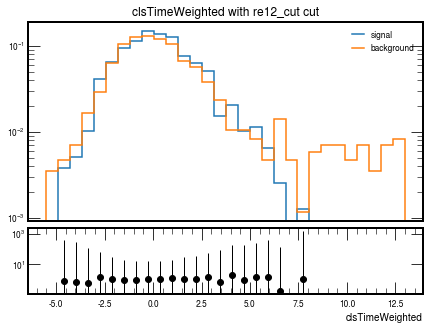

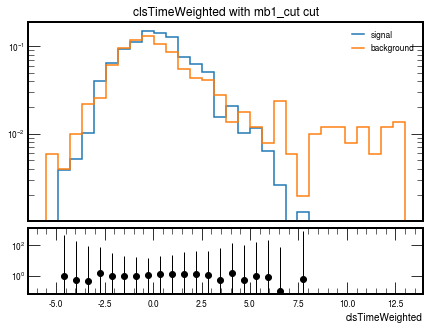

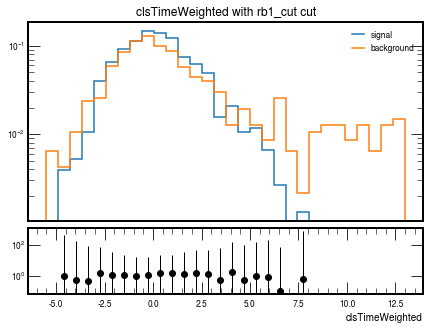

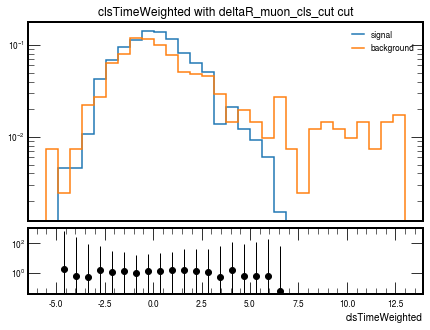

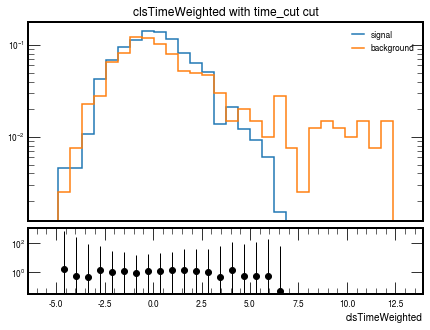

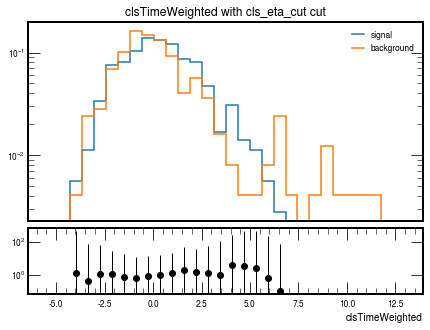

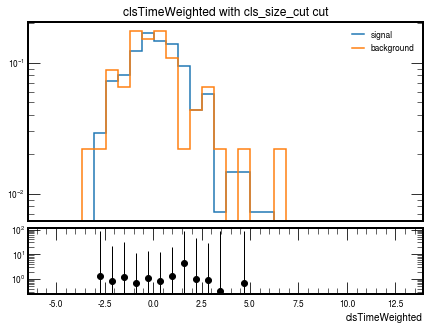

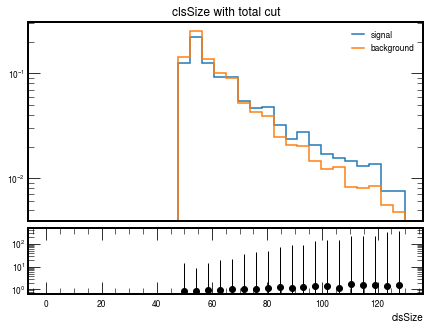

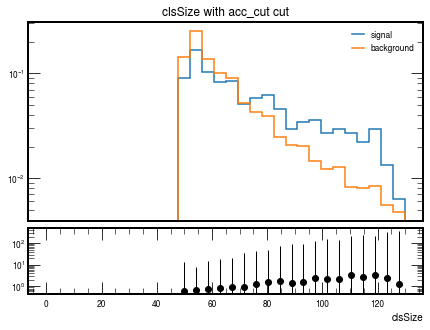

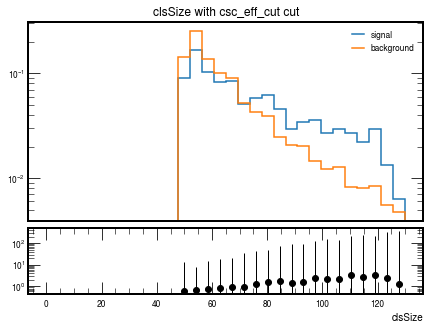

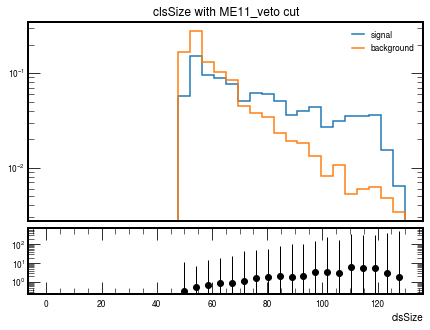

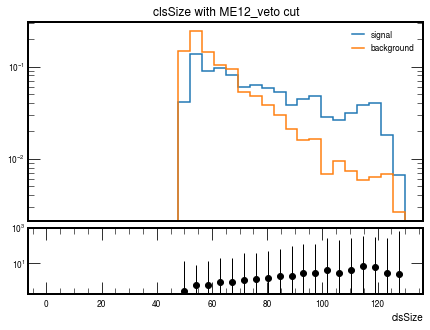

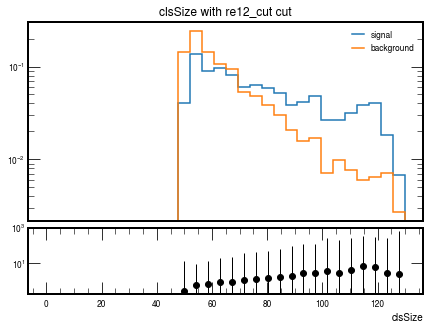

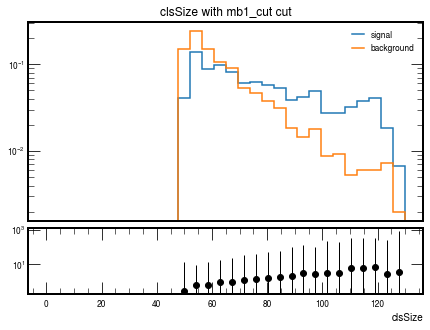

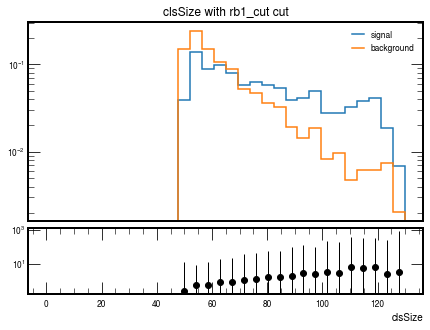

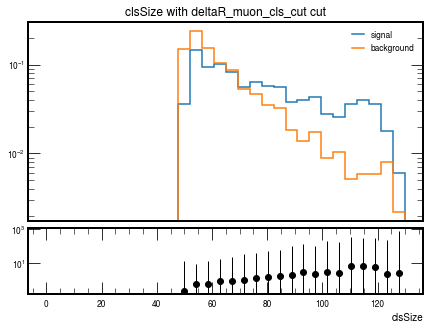

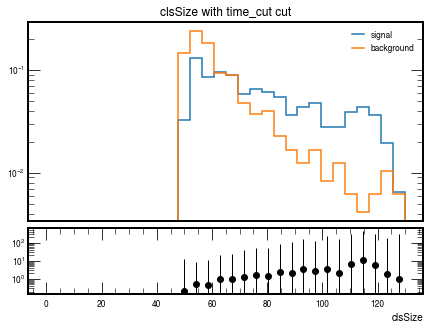

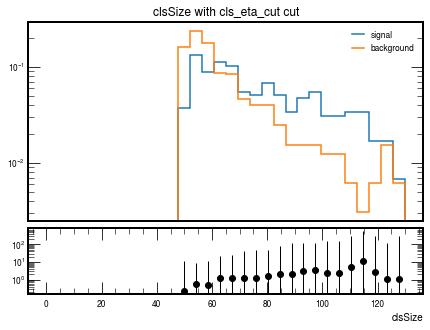

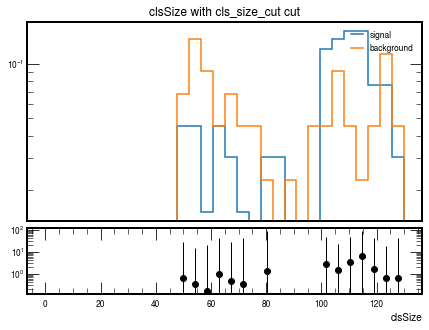

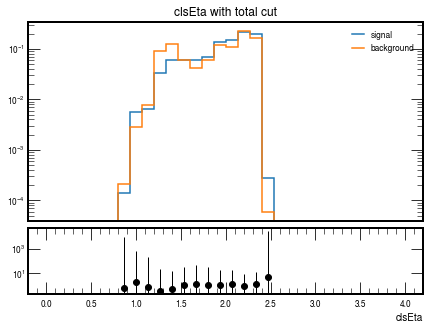

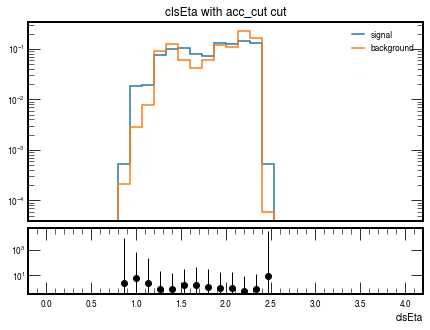

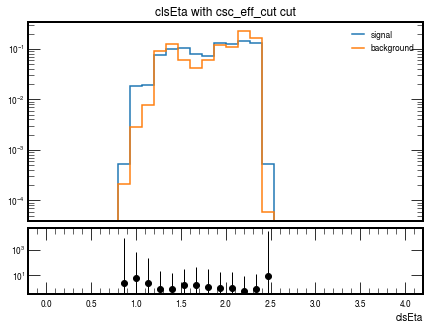

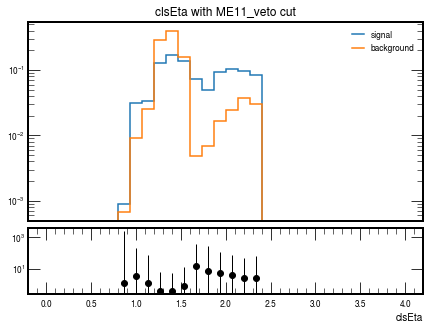

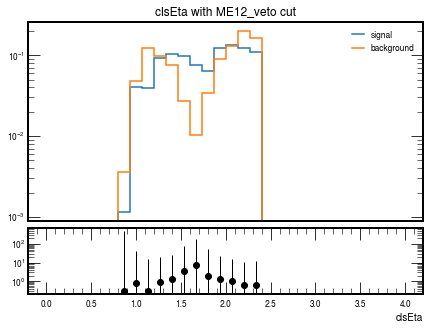

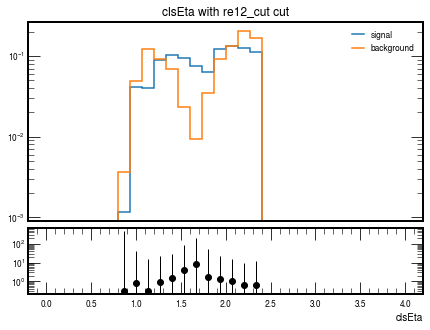

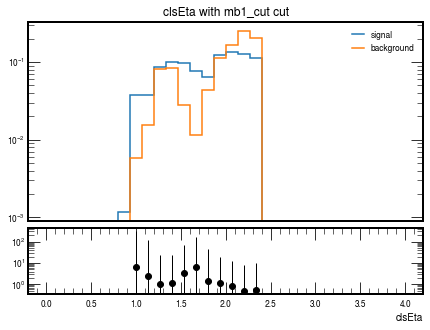

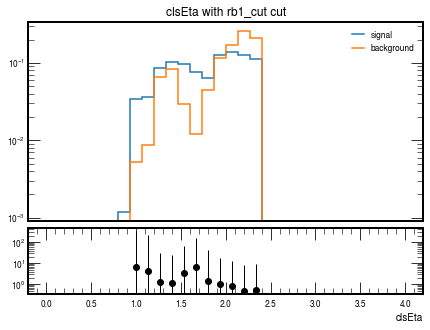

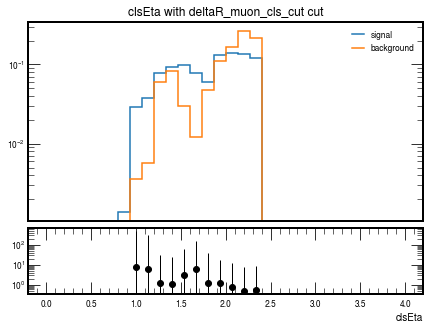

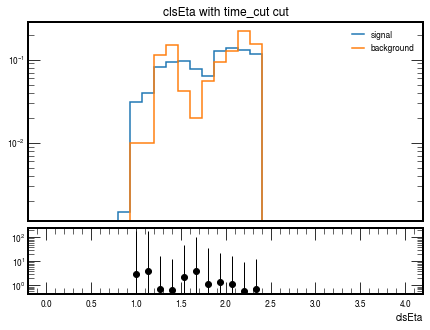

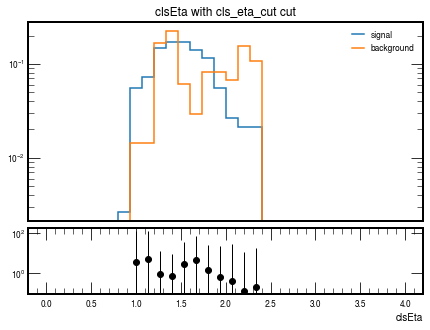

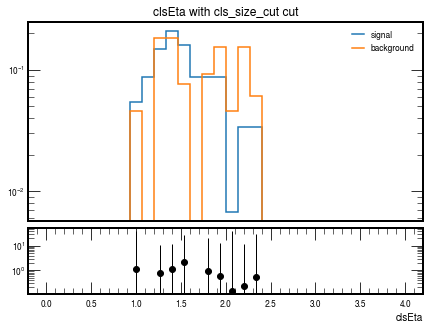

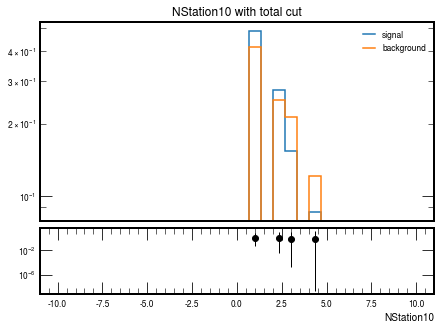

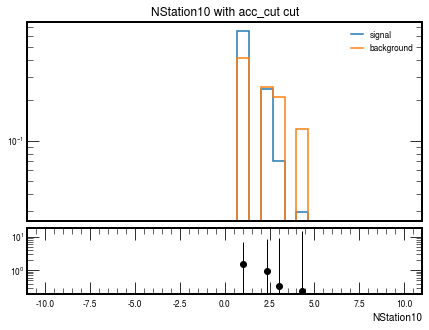

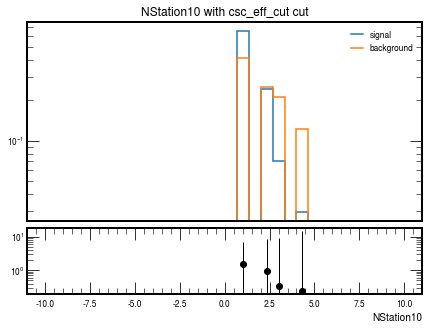

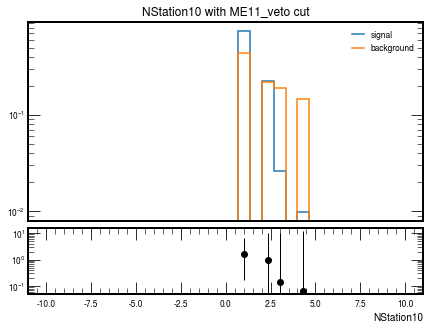

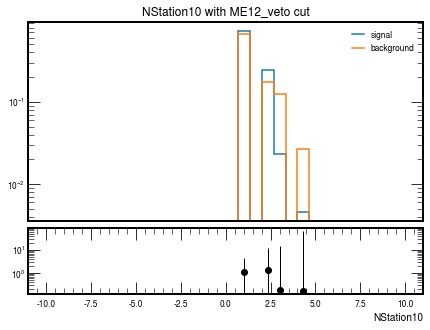

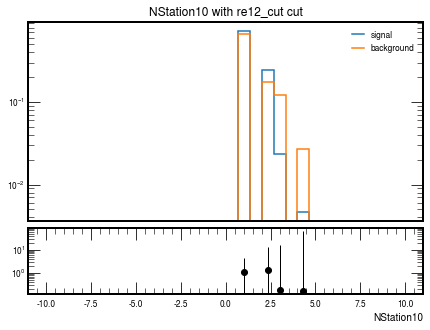

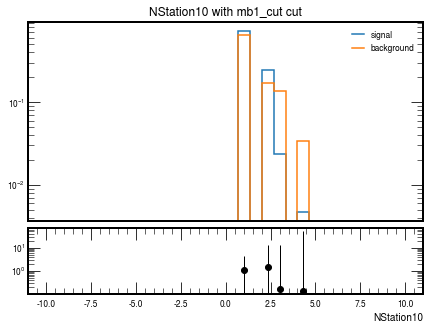

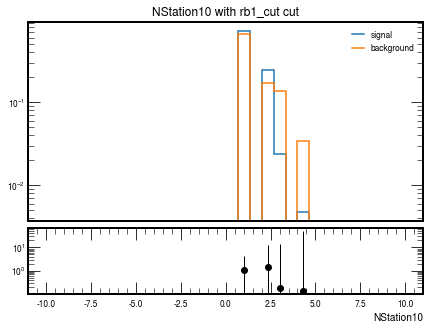

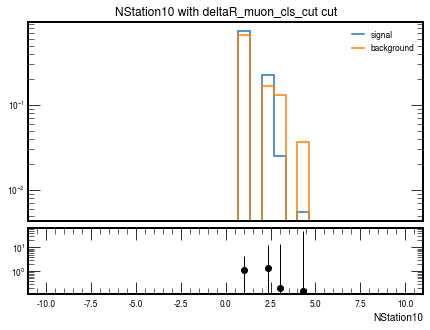

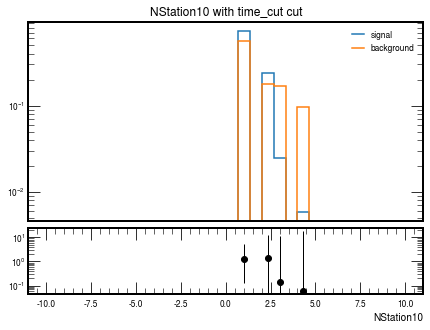

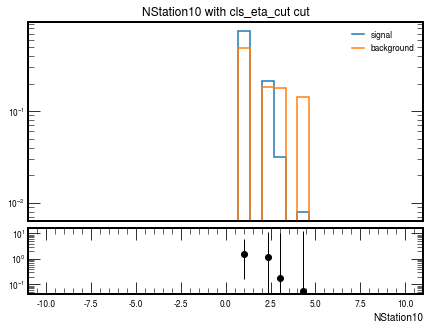

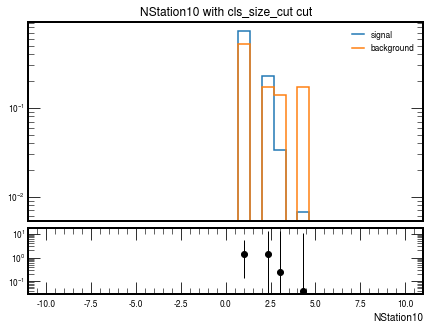

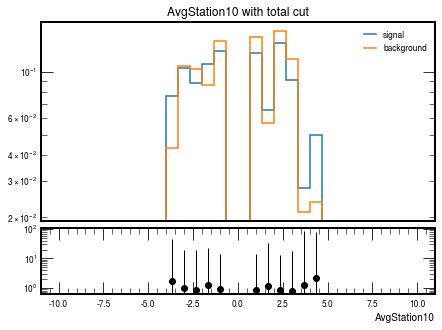

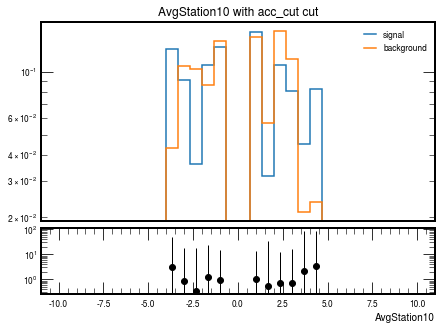

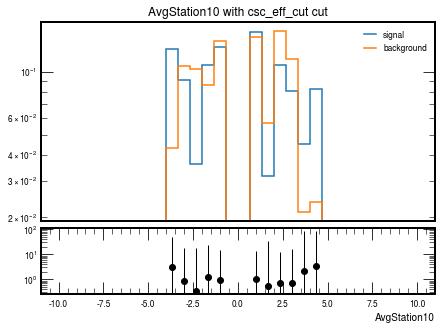

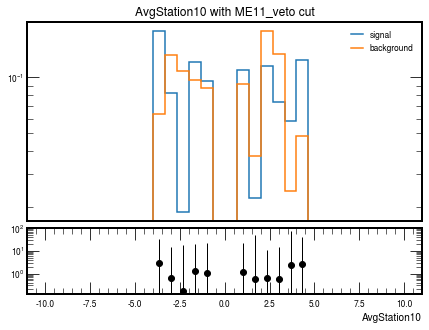

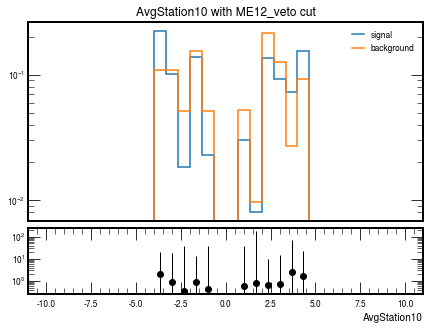

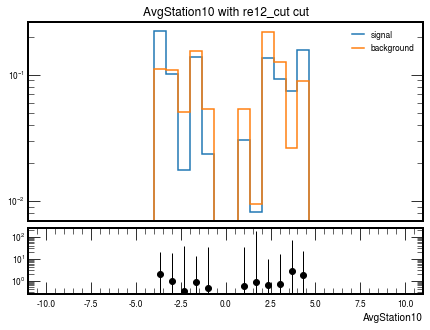

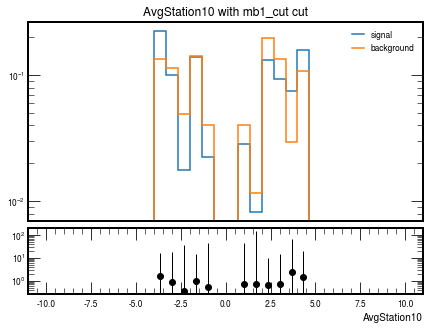

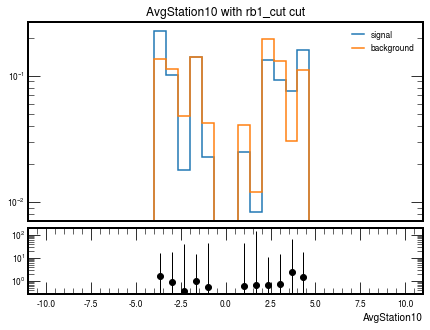

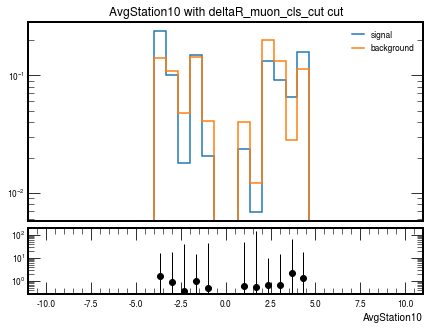

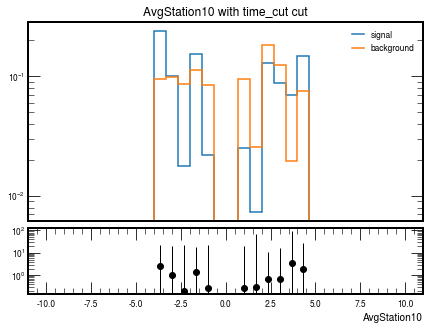

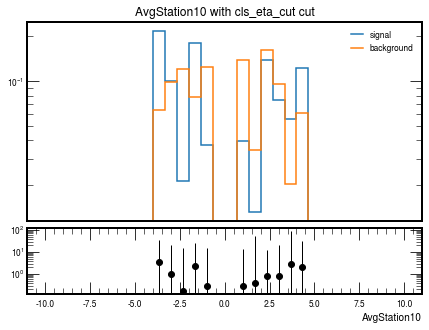

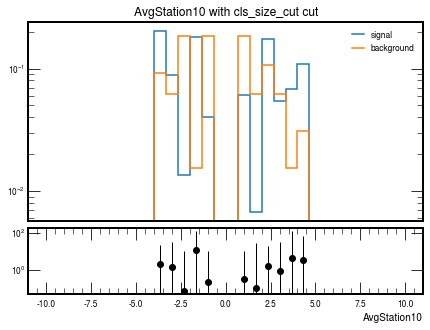

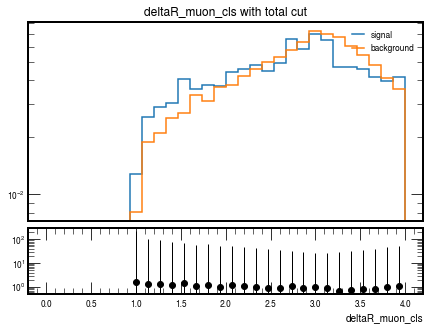

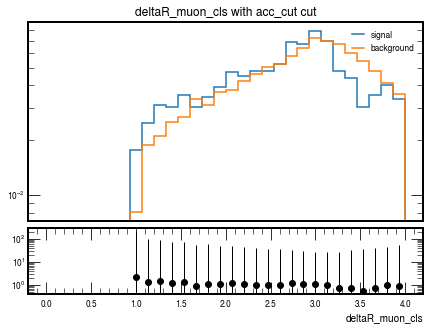

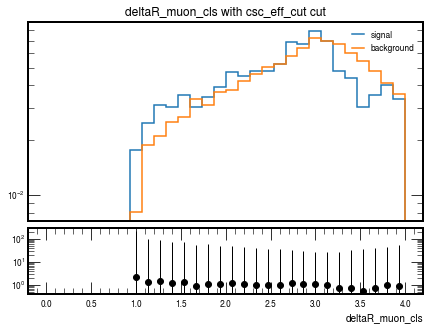

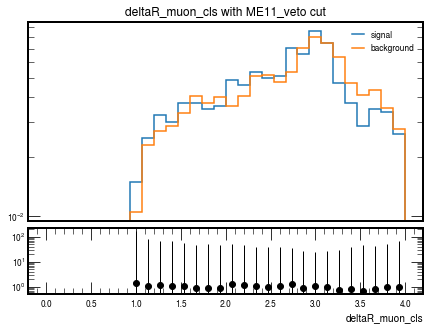

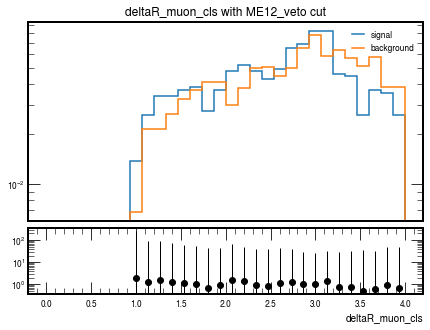

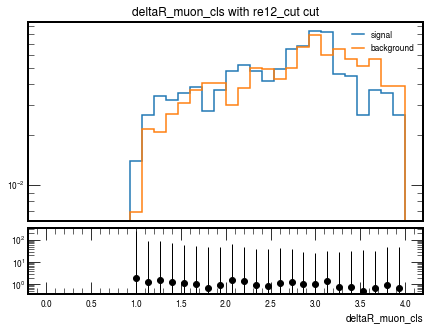

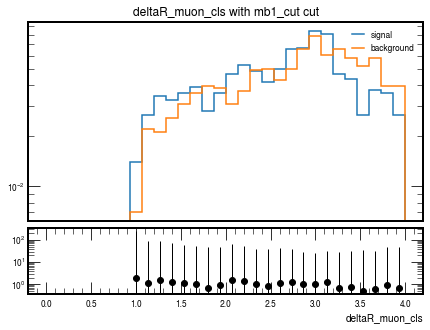

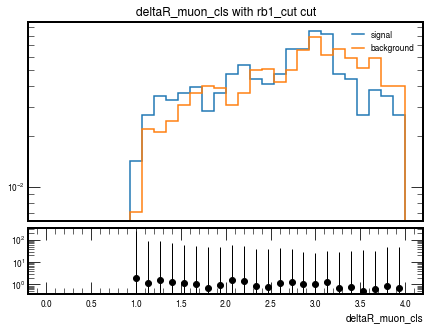

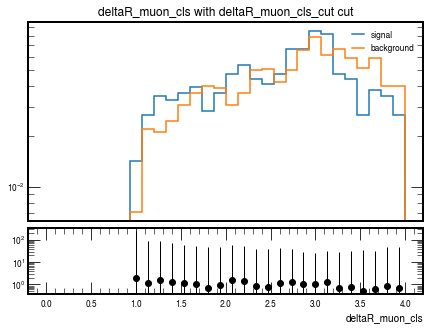

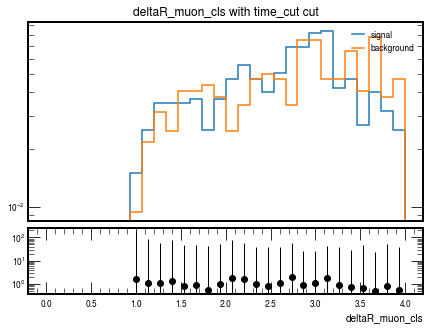

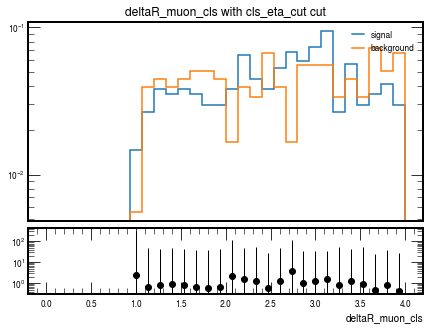

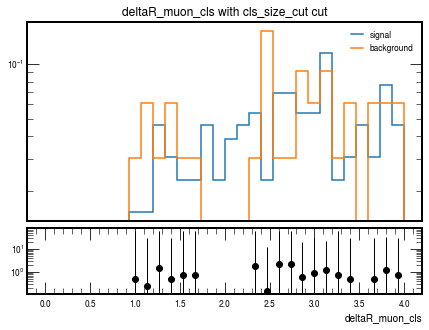

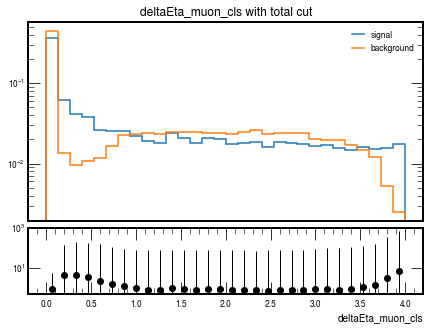

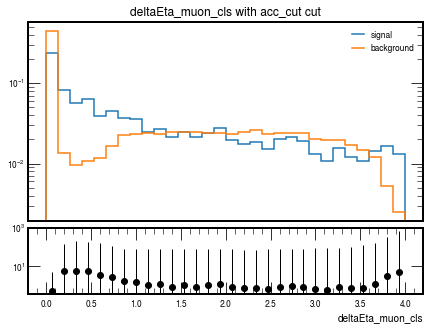

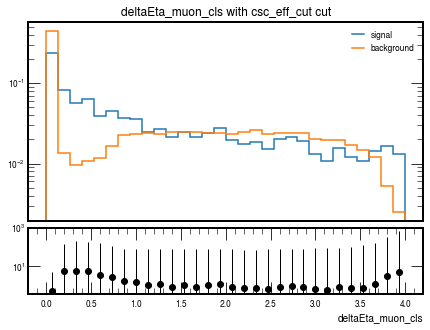

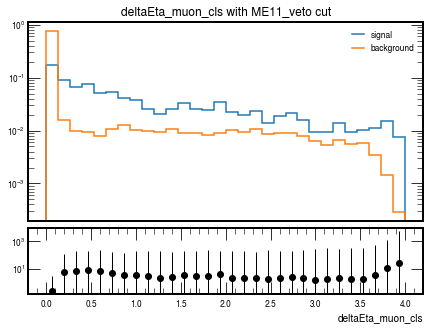

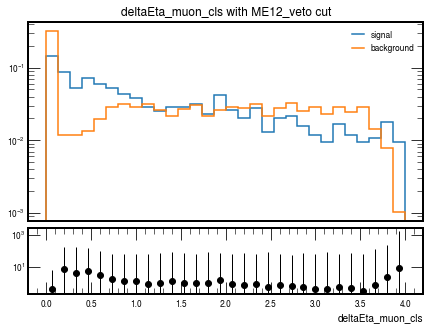

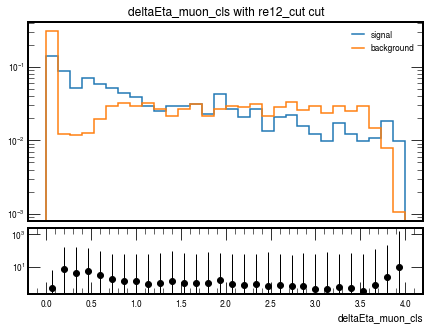

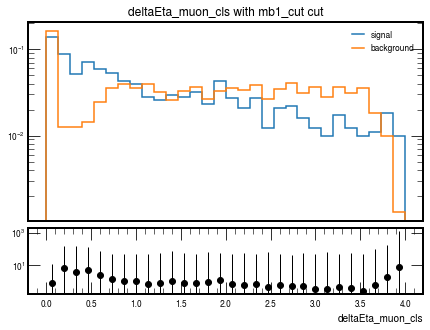

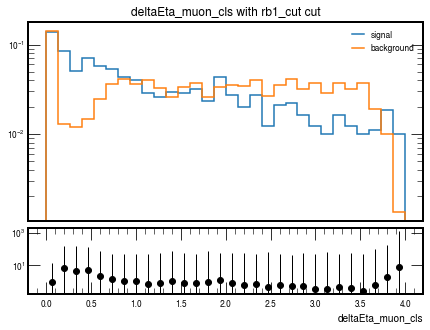

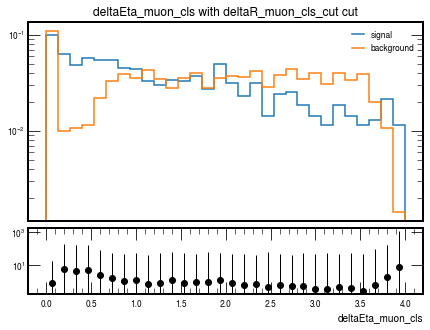

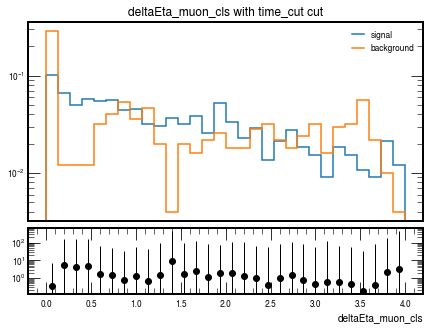

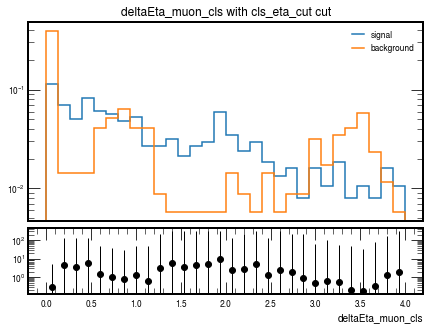

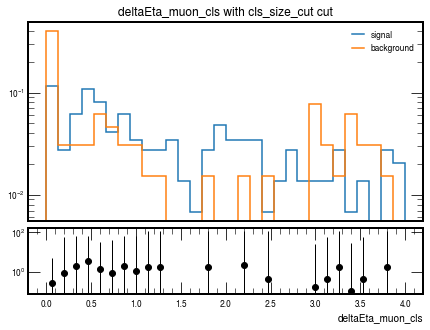

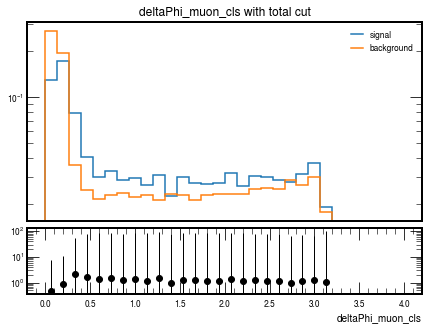

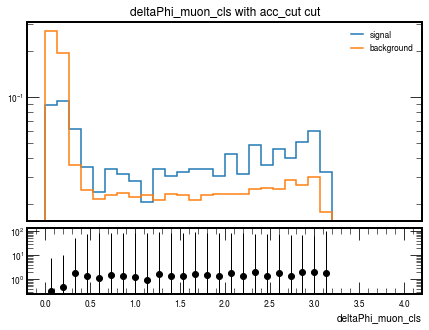

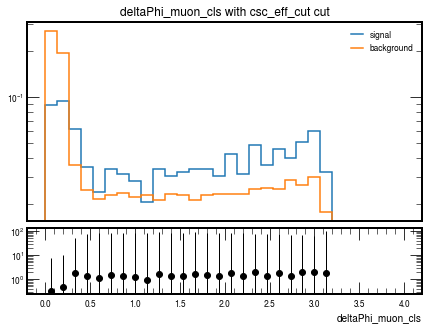

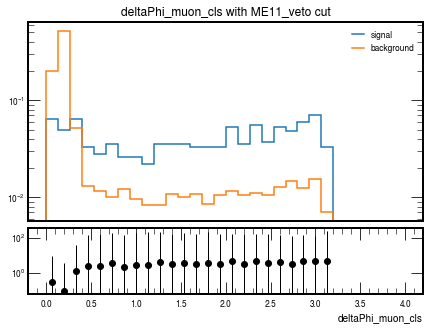

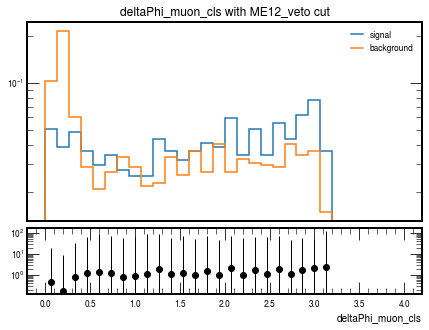

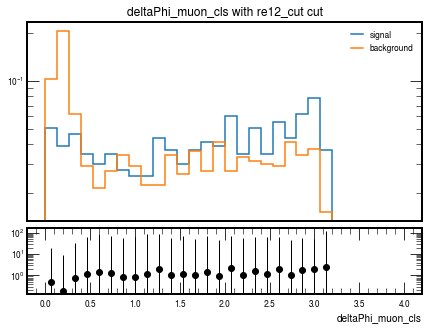

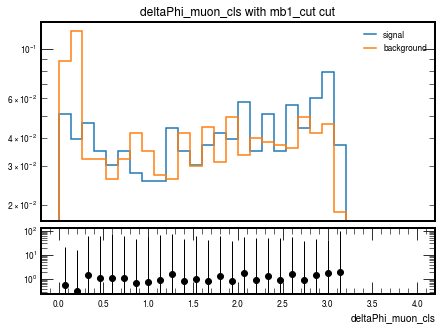

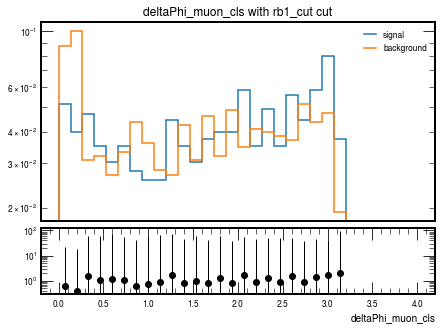

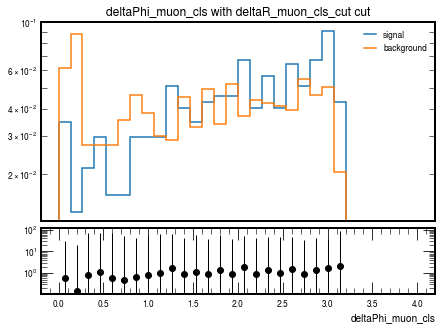

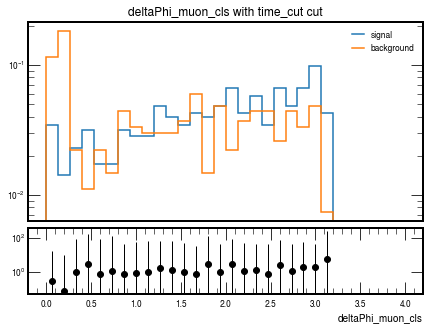

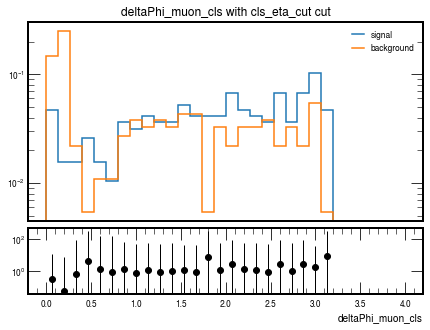

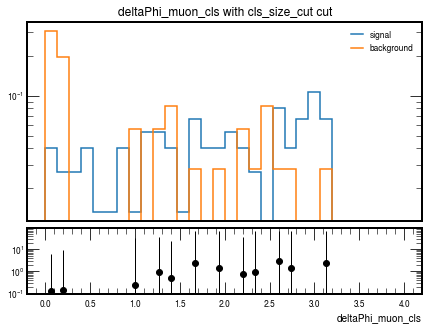

In [56]:
from matplotlib.backends.backend_pdf import PdfPages
import warnings

with warnings.catch_warnings(): #i don't need to see all the divide by zero warnings
    warnings.simplefilter("ignore")

    for varname in varnames:
        #pdf = PdfPages(f'varPlots_sb_clsCuts_{date}/{varname}_cutflow_sb.pdf')

        for cut in cuts:
            fig, ax = plt.subplots(2,1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(np.sqrt(2)*5,5))

            signal = out['signal'][f'{cut}_{varname}']
            background = out['background'][f'{cut}_{varname}']

            hep.histplot(signal/signal.sum(), label='signal', ax=ax[0])
            hep.histplot(background/background.sum(), label='background', ax=ax[0])
            ax[0].set_title(f'{varname} with {cut} cut')
            ax[0].legend()
            ax[0].tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False) # labels along the bottom edge are off
            ax[0].set(xlabel=None)
            ax[0].set_yscale('log')

            ratio(signal/signal.sum(), background/background.sum(), ax[1])
            ax[1].set_xlim(ax[0].get_xlim())
            ax[1].set(xlabel=varname)
            ax[1].set_yscale('log')
            fig.subplots_adjust(wspace=0, hspace=.05)
            #pdf.savefig(fig)
        #pdf.close()


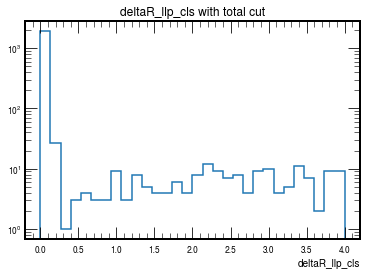

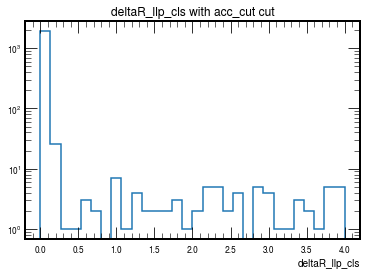

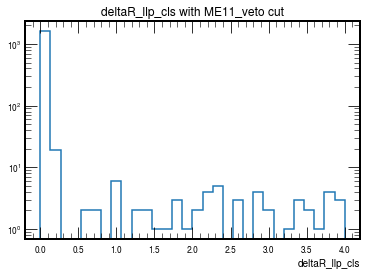

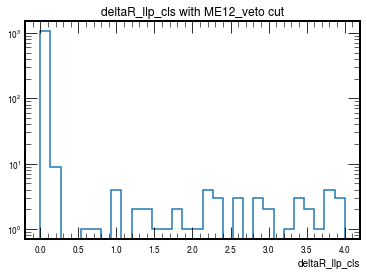

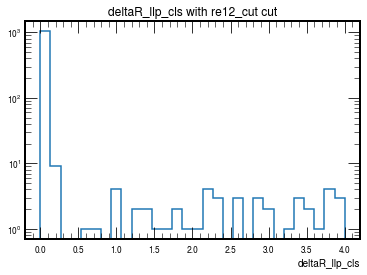

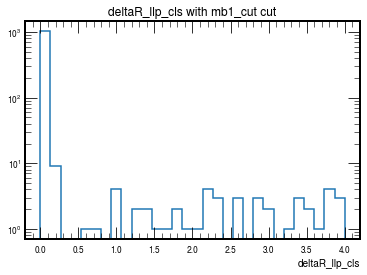

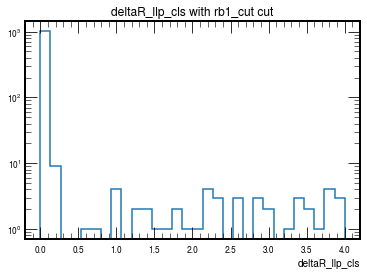

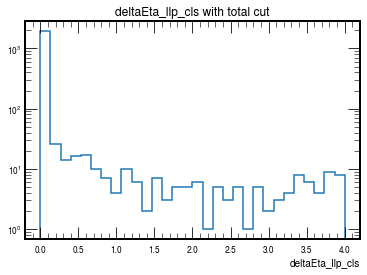

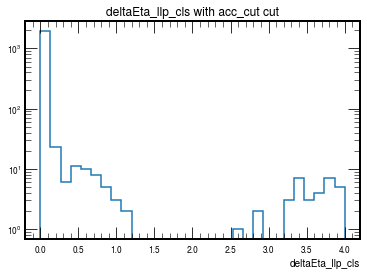

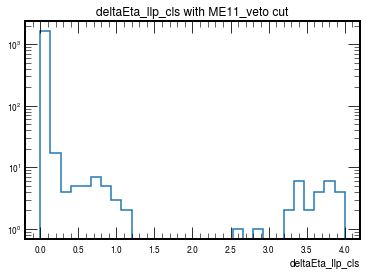

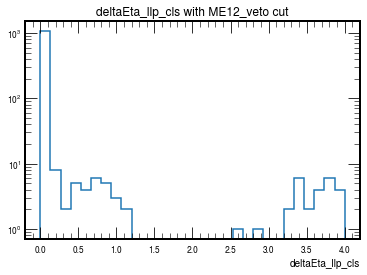

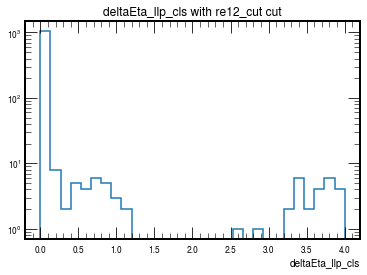

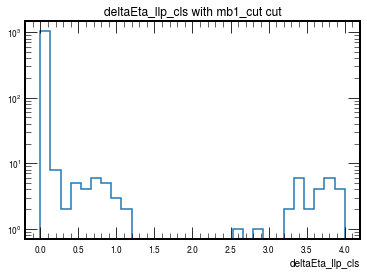

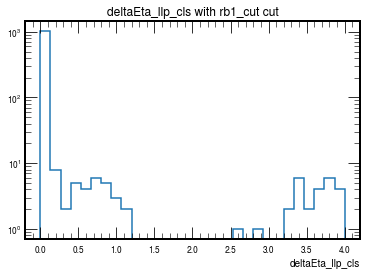

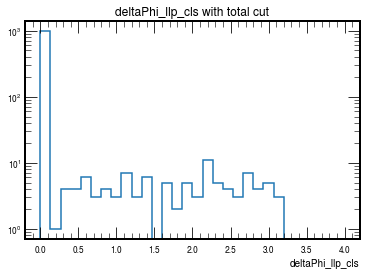

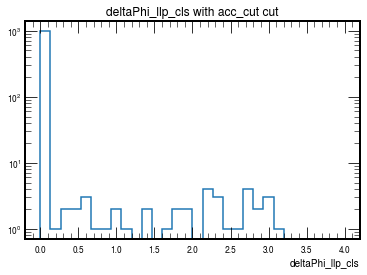

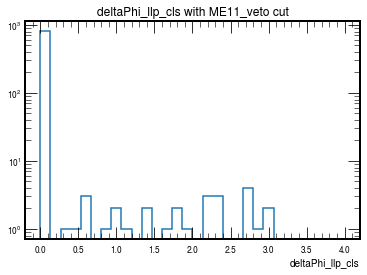

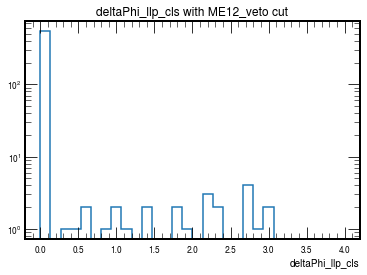

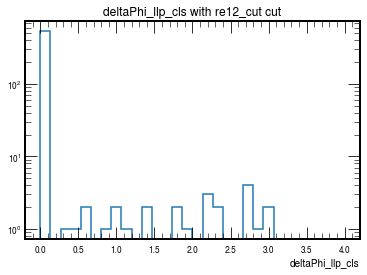

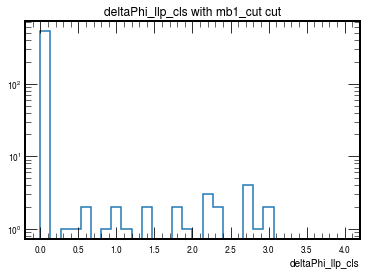

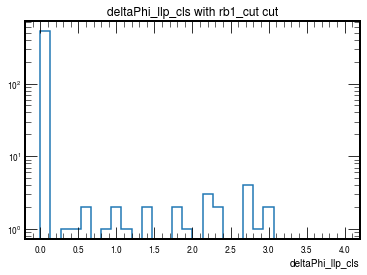

In [6]:
from matplotlib.backends.backend_pdf import PdfPages
import warnings

with warnings.catch_warnings(): #i don't need to see all the divide by zero warnings
    warnings.simplefilter("ignore")
    
    varnames = ['deltaR_llp_cls', 'deltaEta_llp_cls', 'deltaPhi_llp_cls',]

    for varname in varnames:
        pdf = PdfPages(f'deltaREtaPhi_llp_cls_ss_{date}/{varname}_cutflow_sb.pdf')

        for cut in cuts:
            fig, ax = plt.subplots()

            signal = out['signal'][f'{cut}_{varname}']

            hep.histplot(signal, label='signal', ax=ax)
            ax.set_title(f'{varname} with {cut} cut')
            ax.set_yscale('log')
            pdf.savefig(fig)
        pdf.close()


In [5]:
h = out['signal']['rb1_cut_deltaR_llp_cls']
h[1.j:].sum()/h.sum()

0.040262172284644196